# Classify different data sets

### Basic includes

In [3]:
# Using pandas to load the csv file
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from keras import models 
from keras import layers 
from keras import callbacks
from keras.utils import to_categorical

# reuters and fashin mnist data set from keras
from keras.datasets import reuters
from keras.datasets import fashion_mnist

# needed to preprocess text
from keras.preprocessing.text import Tokenizer

### Classify the Fashion Mnist

---

[9 0 0 ... 3 0 5]
(10000, 28, 28)


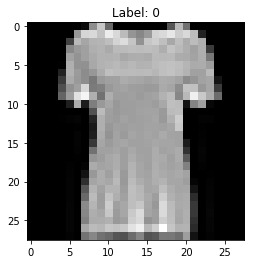

In [4]:
(fashion_train_data, fashion_train_labels), (fashion_test_data, fashion_test_labels) = fashion_mnist.load_data()

print(fashion_train_labels)
print(fashion_test_data.shape)

test_index = 10

plt.title("Label: " + str(fashion_train_labels[test_index]))
plt.imshow(fashion_train_data[test_index], cmap="gray")

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [5]:
#Normalize train images
train_images1 = fashion_train_data.reshape((60000,28*28))
train_images1 = train_images1.astype('float32') / 255
#One hot encoding for train labels
train_labels1 = to_categorical(fashion_train_labels)

#Normalize test images
test_images1 = fashion_test_data.reshape((10000,28*28))
test_images1 = test_images1.astype('float32') / 255
#One hot encoding for test labels
test_labels1 = to_categorical(fashion_test_labels)

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [6]:
#Define model
num_classes_1 = 10
model = models.Sequential()
#First layer of 784
model.add(layers.Dense(784, activation='relu', input_shape=(28*28,)))
# Added dropout between the input and first hidden layer
model.add(layers.Dropout(0.5))
#First hidden layer 
model.add(layers.Dense(355, activation='relu'))
model.add(layers.Dropout(0.3))
#Second hidden layer 
model.add(layers.Dense(240, activation='relu'))
model.add(layers.Dropout(0.3))
#Output layer 
model.add(layers.Dense(num_classes_1, activation='softmax'))
model.summary()

# Included the early stopping which monitors the validation loss
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 355)               278675    
_________________________________________________________________
dropout_2 (Dropout)          (None, 355)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 240)               85440     
_________________________________________________________________
dropout_3 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2410      
Total para

In [7]:
#Train model
history1 = model.fit(train_images1, train_labels1,
          batch_size=512,
          epochs=40,
          validation_split=0.2,
          callbacks=[early_stop], 
          verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
 - 34s - loss: 0.8453 - acc: 0.6899 - val_loss: 0.5013 - val_acc: 0.8198
Epoch 2/40
 - 4s - loss: 0.5450 - acc: 0.8003 - val_loss: 0.4845 - val_acc: 0.8192
Epoch 3/40
 - 5s - loss: 0.4830 - acc: 0.8244 - val_loss: 0.4635 - val_acc: 0.8330
Epoch 4/40
 - 4s - loss: 0.4424 - acc: 0.8375 - val_loss: 0.3958 - val_acc: 0.8532
Epoch 5/40
 - 5s - loss: 0.4142 - acc: 0.8471 - val_loss: 0.4220 - val_acc: 0.8486
Epoch 6/40
 - 4s - loss: 0.3940 - acc: 0.8543 - val_loss: 0.3823 - val_acc: 0.8535
Epoch 7/40
 - 4s - loss: 0.3815 - acc: 0.8590 - val_loss: 0.4020 - val_acc: 0.8481
Epoch 8/40
 - 4s - loss: 0.3683 - acc: 0.8649 - val_loss: 0.3525 - val_acc: 0.8707
Epoch 9/40
 - 4s - loss: 0.3541 - acc: 0.8684 - val_loss: 0.3496 - val_acc: 0.8735
Epoch 10/40
 - 4s - loss: 0.3464 - acc: 0.8726 - val_loss: 0.3436 - val_acc: 0.8771
Epoch 11/40
 - 4s - loss: 0.3381 - acc: 0.8742 - val_loss: 0.3544 - val_acc: 0.8714
Epoch 12/40
 - 4s - loss: 0.3324 -

In [8]:
#Evaluate
results_1 = model.evaluate(test_images1, test_labels1)

print(results_1)

10000/10000 [==============================] - 5s 513us/step
[0.33698276365995405, 0.8886]


In [9]:
history_dict1 = history1.history
print(history_dict1.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [10]:
# Get values from history
acc_1 = history_dict1['acc']
val_acc_1 = history_dict1['val_acc']
loss_1 = history_dict1['loss']
val_loss_1 = history_dict1['val_loss']

epochs = range(1, len(acc_1) + 1)

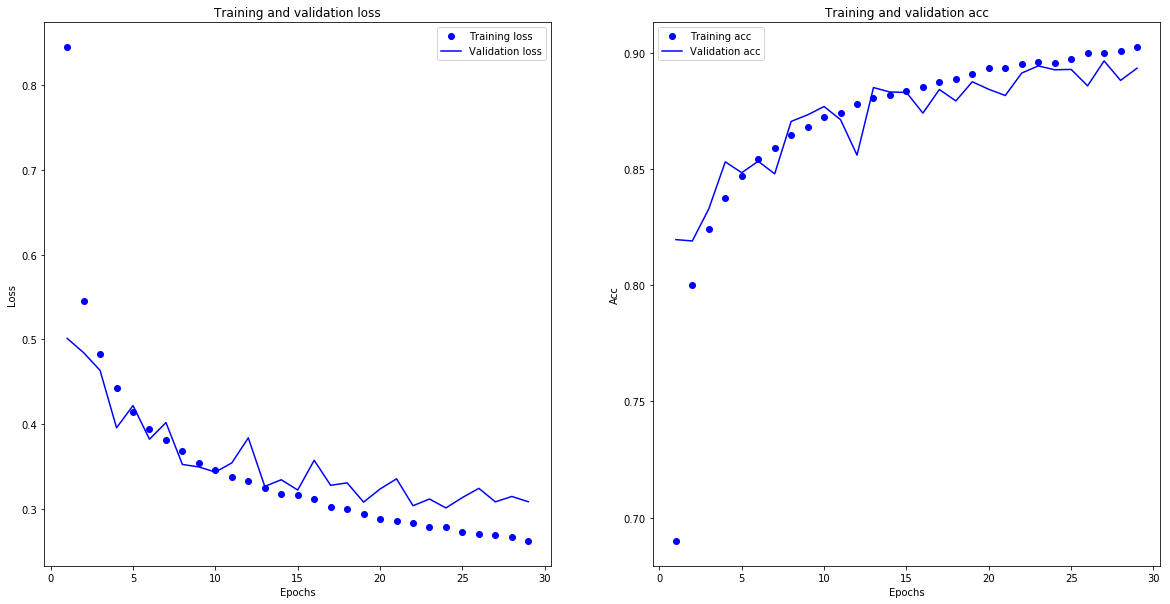

In [11]:
#For plot
# Plot of the validation and training loss
f, (ax1, ax2)=plt.subplots(1,2,figsize=(20,10))
# "bo" is for "blue dot"
ax1.plot(epochs, loss_1, 'bo', label='Training loss')
# b is for "solid blue line"
ax1.plot(epochs, val_loss_1, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, acc_1, 'bo', label='Training acc')
# b is for "solid blue line"
ax2.plot(epochs, val_acc_1, 'b', label='Validation acc')
ax2.set_title('Training and validation acc')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Acc')
ax2.legend()
plt.show()

### Explanation Fashion Mnist

For Fashion Mnist dataset I reshaped all the dataset to (60000,28*28) and then divide it by 255 so the sataset remains in values between 0 and 1. After that, I created an architecture of the input layer with 784 neurons, a dropout of 0.5 to prevent overfitting ,2 hidden layers: one with 355 and the second with 240 both of them with a dropout value of 0.3. The output layer is the 10 classifications the dataset has. All layers, except the last one, have activation relu and the last one has softmax activation. The model is compiled with loss categorical_crossentropy, optimizer rmsprop and accuracy metric; it also has an early stop that monitors 'val_loss' and has a patience value of 5. It trains with 48000 images and validates with 12000 (validation split of 0.2) and test with 10000 images, and when it is trained it uses a batch size of 512

## Classifying newswires

---

Build a network to classify Reuters newswires into 46 different mutually-exclusive topics.

### Load and review the data

In [12]:
(reuters_train_data, reuters_train_labels),(reuters_test_data, reuters_test_labels) = reuters.load_data(num_words=10000)

print(reuters_train_data.shape)
print(reuters_train_labels.shape)
print(reuters_train_data[0])
print(reuters_train_labels[0])

print(set(reuters_train_labels))

(8982,)
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}


Load the word index to decode the train data.

In [13]:
word_index = reuters.get_word_index()

reverse_index = dict([(value+3, key) for (key, value) in word_index.items()])

reverse_index[0] = "<PAD>"
reverse_index[1] = "<START>"
reverse_index[2] = "<UNKNOWN>"  # unknown
reverse_index[3] = "<UNUSED>"

decoded_review = ' '.join([reverse_index.get(i,'?') for i in reuters_train_data[0]])

print(decoded_review)

<START> <UNKNOWN> <UNKNOWN> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [25]:
num_classes_model2 = max(reuters_train_labels)+1
tokenizer = Tokenizer(num_words=10000)
train_data_token = tokenizer.sequences_to_matrix(reuters_train_data, mode='binary')
test_data_token = tokenizer.sequences_to_matrix(reuters_test_data, mode='binary')

# One-hot encoding the output
one_hot_train_labels = to_categorical(reuters_train_labels,num_classes_model2)
one_hot_test_labels = to_categorical(reuters_test_labels,num_classes_model2)

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [40]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model1.add(layers.Dropout(0.5))
#model1.add(layers.Dense(64, activation='relu'))
#model1.add(layers.Dropout(0.5))
#model1.add(layers.Dense(64, activation='relu'))
#model1.add(layers.Dropout(0.5))
#model1.add(layers.Dense(64, activation='relu'))
#model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(num_classes_model2, activation='softmax'))

model1.summary()
# included the early stopping which monitors the validation loss
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=2)
model1.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 46)                23598     
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model1.fit(train_data_token, one_hot_train_labels,
          batch_size=128,
          epochs=5,
          validation_split=0.2,
          callbacks=[early_stop], 
          verbose=2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/5
 - 7s - loss: 1.4660 - acc: 0.6884 - val_loss: 1.0088 - val_acc: 0.7841
Epoch 2/5
 - 6s - loss: 0.7033 - acc: 0.8507 - val_loss: 0.8791 - val_acc: 0.8080
Epoch 3/5
 - 6s - loss: 0.4334 - acc: 0.9081 - val_loss: 0.8432 - val_acc: 0.8091
Epoch 4/5
 - 6s - loss: 0.2973 - acc: 0.9339 - val_loss: 0.8445 - val_acc: 0.8219
Epoch 5/5
 - 6s - loss: 0.2290 - acc: 0.9482 - val_loss: 0.9253 - val_acc: 0.8108


In [42]:
results = model1.evaluate(test_data_token, one_hot_test_labels)

print(results)

2246/2246 [==============================] - 2s 796us/step
[0.9582872545729761, 0.8040961709706145]


In [43]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [44]:
acc_2 = history_dict['acc']
val_acc_2 = history_dict['val_acc']
loss_2 = history_dict['loss']
val_loss_2 = history_dict['val_loss']

epochs = range(1, len(acc_2) + 1)

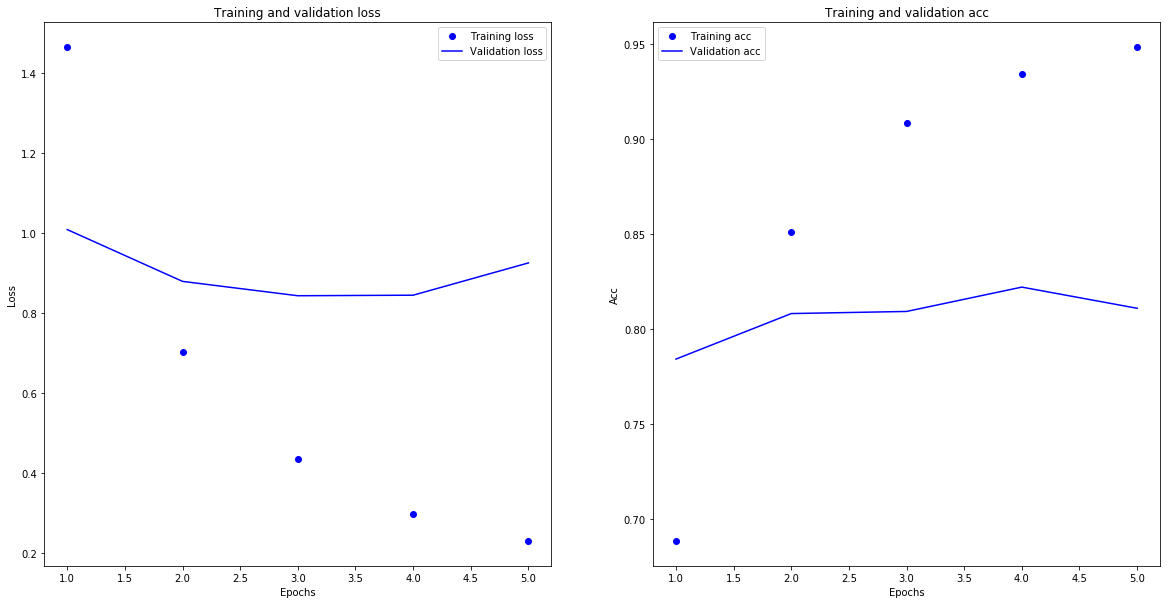

In [45]:
#For plot
# Plot of the validation and training loss
f, (ax1, ax2)=plt.subplots(1,2,figsize=(20,10))
# "bo" is for "blue dot"
ax1.plot(epochs, loss_2, 'bo', label='Training loss')
# b is for "solid blue line"
ax1.plot(epochs, val_loss_2, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, acc_2, 'bo', label='Training acc')
# b is for "solid blue line"
ax2.plot(epochs, val_acc_2, 'b', label='Validation acc')
ax2.set_title('Training and validation acc')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Acc')
ax2.legend()
plt.show()

### Explanation Reuters

For Reuters dataset I selected the 10000 most used words, and apply to the train and test data the tokenizer.sequences_to_matrix method with the mode "binary" and then perform one hot encoding to the labels. After that, I created an architecture of the input layer with 512 neurons, a dropout of 0.5 to prevent overfitting and the output layer is the 46 classifications the dataset has. All layers, except the last one, have activation relu and the last one has softmax activation. The model is compiled with loss categorical_crossentropy, optimizer rmsprop and accuracy metric; it also has an early stop that monitors 'val_loss' and has a patience value of 5. It trains with 7185 images and validates with 1797 (validation split of 0.2) and test with 2246 images. This dataset was tested with many layer configuration: with two or more hidden layers with a number of neurons greater that the output layer but this configuration decreases the accuracy value, so that was discarded. After that I tried different optimizers such as adamax, SGD and adam but none of them improved the accuracy, rmsprop was the most stable and accurate in the results. Also I changed from mode "binary" to "freq" in the tokenizer.sequences_to_matrix, and romoved the early stop with 100 epochs in which I obtained a 81% of accuracy but with a overfit in the model. So I returned to "binary", add the early stop and reduce the epochs to 50 where I obtained between 79% and 80% of accuracy, but avoiding overfitting its possible by doing about 3 epochs.

## Predicting Student Admissions

---

Predict student admissions based on three pieces of data:

- GRE Scores
- GPA Scores
- Class rank

### Load and visualize the data

In [46]:
student_data = pd.read_csv("data/student_data.csv")
#print(student_data)

Plot of the GRE and the GPA from the data.

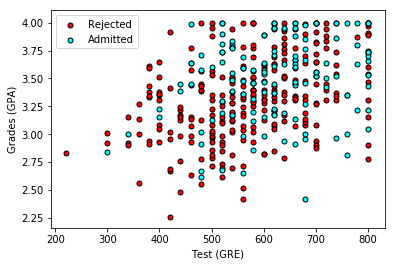

In [47]:
X = np.array(student_data[["gre","gpa"]])
y = np.array(student_data["admit"])
admitted = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]
plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k',label='Rejected')
plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k', label='Admitted')
plt.xlabel('Test (GRE)')
plt.ylabel('Grades (GPA)')
plt.legend()
plt.show()

Plot of the data by class rank.

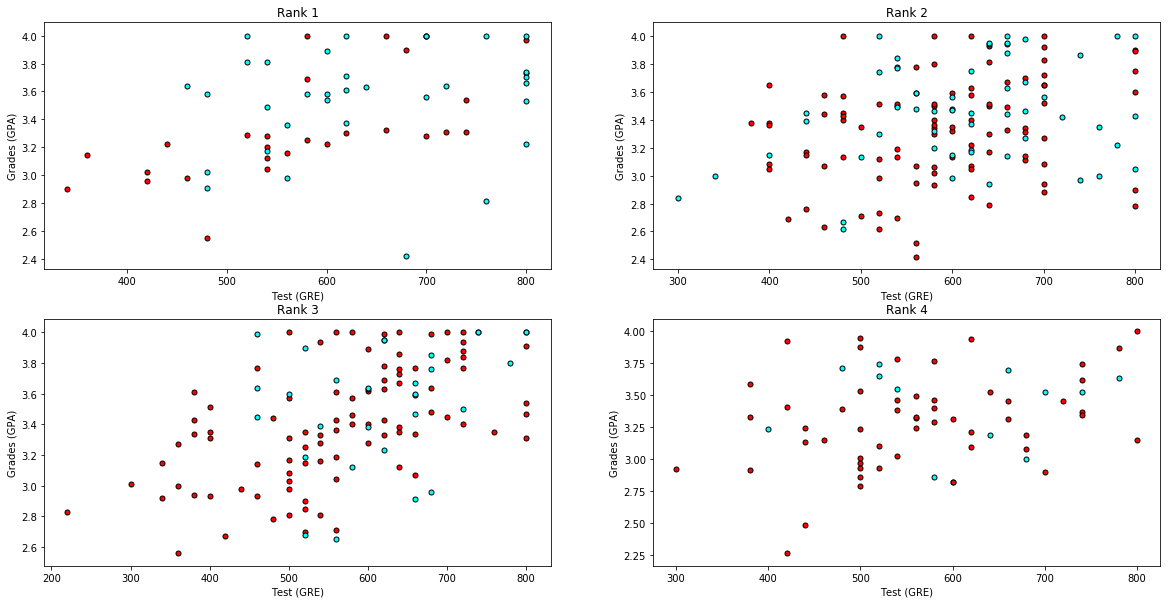

In [48]:
f, plots = plt.subplots(2, 2, figsize=(20,10))
plots = [plot for sublist in plots for plot in sublist]

for idx, plot in enumerate(plots):
    data_rank = student_data[student_data["rank"]==idx+1]
    plot.set_title("Rank " + str(idx+1))
    X = np.array(data_rank[["gre","gpa"]])
    y = np.array(data_rank["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plot.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plot.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plot.set_xlabel('Test (GRE)')
    plot.set_ylabel('Grades (GPA)')
    

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [49]:
maxGRE = max(np.array(student_data["gre"]))
maxGPA = max(np.array(student_data["gpa"]))
num_class_3 = 2

student_data=student_data.fillna(0)

preprocessed_data = pd.concat([student_data,pd.get_dummies(student_data["rank"], prefix='rank')],axis=1)
preprocessed_data = preprocessed_data.drop("rank",axis=1)
processed_data = preprocessed_data[:]
processed_data["gre"] = processed_data["gre"] / maxGRE
processed_data["gpa"] = processed_data["gpa"] / maxGPA
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))

features = train_data.drop('admit', axis=1)
features_test = test_data.drop('admit', axis=1)
targets = to_categorical(train_data['admit'],num_class_3)
targets_test = to_categorical(test_data['admit'],num_class_3)

print(features[:10])
print(targets[:10])
print(features.shape)
print(features_test.shape)

Number of training samples is 360
Number of testing samples is 40
       gre     gpa  rank_0.0  rank_1.0  rank_2.0  rank_3.0  rank_4.0
349  0.775  0.7125         0         0         1         0         0
250  0.825  0.8275         0         0         0         0         1
229  0.900  0.8550         0         0         1         0         0
173  1.000  0.8575         0         0         1         0         0
17   0.450  0.6400         0         0         0         1         0
278  0.850  0.7500         0         0         0         0         1
280  0.825  0.9850         0         0         1         0         0
375  0.700  0.8725         0         0         0         0         1
327  0.700  0.8700         0         0         1         0         0
117  0.875  0.9300         0         0         1         0         0
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]
(360, 7)
(40, 7)


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [101]:
model2 = models.Sequential()
model2.add(layers.Dense(128,activation='relu', input_shape=(features.shape[1],)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(64,activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(num_class_3, activation='softmax'))

model2.summary()
# included the early stopping which monitors the validation loss
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10)
model2.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 128)               1024      
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_29 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 2)                 130       
Total params: 9,410
Trainable params: 9,410
Non-trainable params: 0
_________________________________________________________________


In [102]:
history = model2.fit(features, targets,
          batch_size=16,
          epochs=100,
          validation_split=0.2,
          callbacks=[early_stop], 
          verbose=2)

Train on 288 samples, validate on 72 samples
Epoch 1/100
 - 1s - loss: 0.6365 - acc: 0.6458 - val_loss: 0.6346 - val_acc: 0.6667
Epoch 2/100
 - 0s - loss: 0.6145 - acc: 0.7049 - val_loss: 0.6309 - val_acc: 0.6667
Epoch 3/100
 - 0s - loss: 0.6151 - acc: 0.6806 - val_loss: 0.6333 - val_acc: 0.6667
Epoch 4/100
 - 0s - loss: 0.6153 - acc: 0.7083 - val_loss: 0.6276 - val_acc: 0.6667
Epoch 5/100
 - 0s - loss: 0.6123 - acc: 0.6840 - val_loss: 0.6289 - val_acc: 0.6667
Epoch 6/100
 - 0s - loss: 0.6239 - acc: 0.6875 - val_loss: 0.6251 - val_acc: 0.6667
Epoch 7/100
 - 0s - loss: 0.6252 - acc: 0.6667 - val_loss: 0.6218 - val_acc: 0.6667
Epoch 8/100
 - 0s - loss: 0.6128 - acc: 0.7014 - val_loss: 0.6223 - val_acc: 0.6667
Epoch 9/100
 - 0s - loss: 0.6152 - acc: 0.6806 - val_loss: 0.6192 - val_acc: 0.6667
Epoch 10/100
 - 0s - loss: 0.6140 - acc: 0.6840 - val_loss: 0.6208 - val_acc: 0.6667
Epoch 11/100
 - 0s - loss: 0.6188 - acc: 0.6944 - val_loss: 0.6197 - val_acc: 0.6667
Epoch 12/100
 - 0s - loss: 0.

In [103]:
results = model2.evaluate(features_test, targets_test)

print(results)

40/40 [==============================] - 0s 251us/step
[0.5585367918014527, 0.75]


In [104]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [105]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

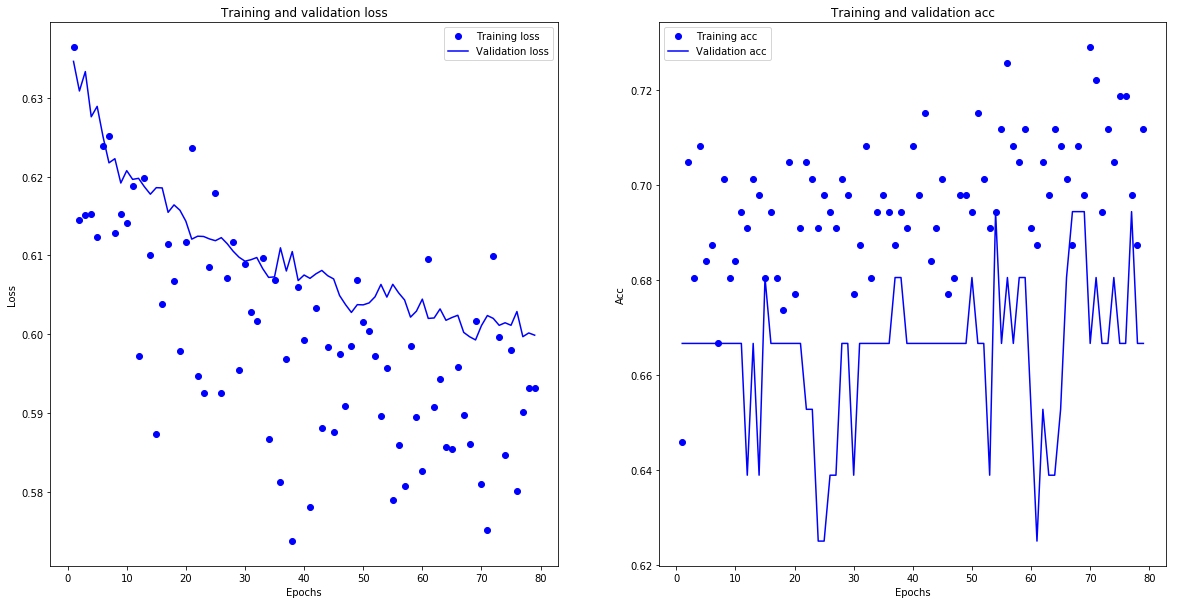

In [106]:
#For plot
# Plot of the validation and training loss
f, (ax1, ax2)=plt.subplots(1,2,figsize=(20,10))
# "bo" is for "blue dot"
ax1.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
ax1.plot(epochs, val_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, acc, 'bo', label='Training acc')
# b is for "solid blue line"
ax2.plot(epochs, val_acc, 'b', label='Validation acc')
ax2.set_title('Training and validation acc')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Acc')
ax2.legend()
plt.show()

### Explanation Student Admissions

For this Students Admission dataset first I analyzed the data in order to know in which way I could normalize it. After that I did a encoding of the ranks of the students, then I normalize the GPA and GRE elements dividing each one by the highest number of their column so all will be between 0 and 1. Then I shuffle the data and prepared a 90% train and 10% test data, I separated the labels using the admit column and then apply one hot encoding to them. After that, I created an architecture of the input layer with 512 neurons, a dropout of 0.5 to prevent overfitting and an output layer of 2 classifications the dataset has. All layers, except the last one, have activation relu and the last one has softmax activation. The model is compiled with loss categorical_crossentropy, optimizer rmsprop and accuracy metric; it also has an early stop that monitors 'val_loss' and has a patience value of 5. This dataset was tested with many layer configuration: with two or more hidden layers with a number of neurons greater that the output layer but this configuration decreases the accuracy value, so that was discarded. Also I change the number of neurons to lower quantity because it give better results of general accuracy but it is has also overfitting. This could be improved with more data.